## Instalando todo lo requerido
- Instalamos e importamos las librerias necesarias de python.

In [ ]:
# Manejo general de los datos
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
%matplotlib inline
sns.set_color_codes = True

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


•	Vinculamos a este colab nuestro perfil de drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


•	Una vez vinculada copiamos la ruta del archivo de la BD a analizar en este caso es: "vigilancia-respiratorias-agudas-2018-hasta-2020_0106.csv”.

In [ ]:
# ASIGNAMOS UN NOMBRE AL DATA FRAME
BD_RESP_2 = df = pd.read_csv("/content/drive/MyDrive/TP FINAL IMBD/vigilancia-respiratorias-agudas-2018-hasta-20200106.csv")

•	Verificamos el número de filas y columnas del DataFrame.

In [ ]:
#INSPECCION DE BD
BD_RESP_2.shape

(790773, 10)

In [ ]:
BD_RESP_2.columns

Index(['departamento_id', 'departamento_nombre', 'provincia_id',
       'provincia_nombre', 'anio', 'semanas_epidemiologicas', 'evento_nombre',
       'grupo_edad_id', 'grupo_edad_desc', 'cantidad_casos'],
      dtype='object')

- Verificamos el código con los valores unicos "counts" de cada columna con la cantidad de veces que aparece.
 - "evento_nombre"
 - "anio"
 - "grupo_edad_desc"

In [ ]:
BD_RESP_2['evento_nombre'].value_counts()

Enfermedad tipo influenza (ETI)       513665
Neumonia                              151879
Bronquiolitis en menores de 2 anos    125229
Name: evento_nombre, dtype: int64

In [ ]:
BD_RESP_2['anio'].value_counts()

2019    442402
2018    348358
2020        13
Name: anio, dtype: int64

In [ ]:
BD_RESP_2['grupo_edad_desc'].value_counts()

12 a 23 m        88404
6 a 11 m         77884
45 a 64          75271
2 a 4            69669
5 a 9            68567
25 a 34          65738
35 a 44          64325
10 a 14          55510
< 6 m            54720
15 a 19          53465
20 a 24          45989
65 a 74          42503
>= a 75          22611
Edad Sin Esp.     6117
Name: grupo_edad_desc, dtype: int64

- Este código calcula los conteos normalizados de los casos por rango etario, muestra la distribución porcentual en un gráfico de barras horizontales.

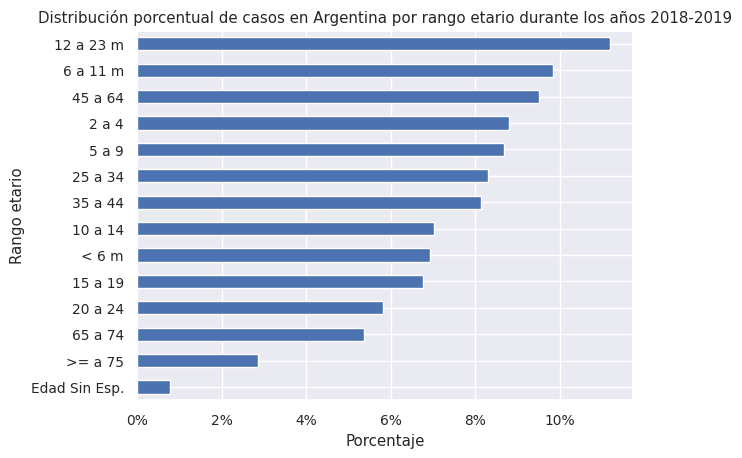

In [ ]:
#TENDENCIA DE CASOS POR RANGO ETARIO.

# Calcular los conteos normalizados
BD_RESP_2_counts = df.sort_values("grupo_edad_desc", ascending=False)["grupo_edad_desc"].value_counts(normalize=True, sort=False)

# Ordenar los valores de manera ascendente
BD_RESP_2_counts.sort_values(ascending=True, inplace=True)

# Crear el gráfico de barras horizontales
BD_RESP_2_counts.plot(kind="barh")

# Formatear el eje x para mostrar los valores en porcentaje
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))
plt.title('Distribución porcentual de casos en Argentina por rango etario durante los años 2018-2019')
plt.xlabel('Porcentaje')
plt.ylabel('Rango etario')



# Mostrar el gráfico
plt.show()


- Este código agrupa los datos de eventos respiratorios por año, calcula la suma de casos por evento y muestra la distribución porcentual en dos gráficos de torta separados por año.

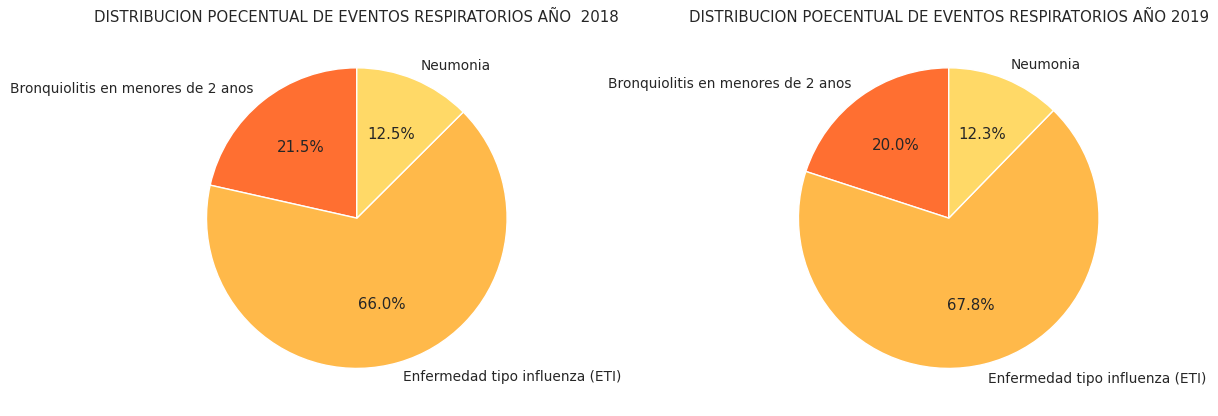

In [ ]:
#DISTRIBUCION PORCENTUAL DE EVENTOS RESPIRATORIOS POR AÑO

import matplotlib.pyplot as plt

# Agrupar los datos por evento_nombre y año, y obtener la suma de cantidad_casos
data_agrupada = BD_RESP_2.groupby(['evento_nombre', 'anio'])['cantidad_casos'].sum().unstack()

# Obtener la lista de años
anios = data_agrupada.columns

# Crear una lista de colores cálidos
colores_calidos = ['#FF6F31', '#FFB94A', '#FFD967', '#FFE884', '#FFF2A1']

# Crear una figura con dos subplots (uno por cada año)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico 1 - Año 1
ax1.pie(data_agrupada[anios[0]], labels=data_agrupada.index, autopct='%1.1f%%', startangle=90, colors=colores_calidos)
ax1.set_title('DISTRIBUCION POECENTUAL DE EVENTOS RESPIRATORIOS AÑO  {}'.format(anios[0]))

# Gráfico 2 - Año 2
ax2.pie(data_agrupada[anios[1]], labels=data_agrupada.index, autopct='%1.1f%%', startangle=90, colors=colores_calidos)
ax2.set_title('DISTRIBUCION POECENTUAL DE EVENTOS RESPIRATORIOS AÑO {}'.format(anios[1]))

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


- Este código compara la cantidad de casos de eventos respiratorios por provincia entre dos años (2018 y 2019). Se filtran los datos para cada año, se calcula la suma de casos por provincia y se muestra la comparación en un gráfico de barras.
- Cada barra representa una provincia y el eje x muestra las provincias, mientras que el eje y muestra la cantidad de casos.

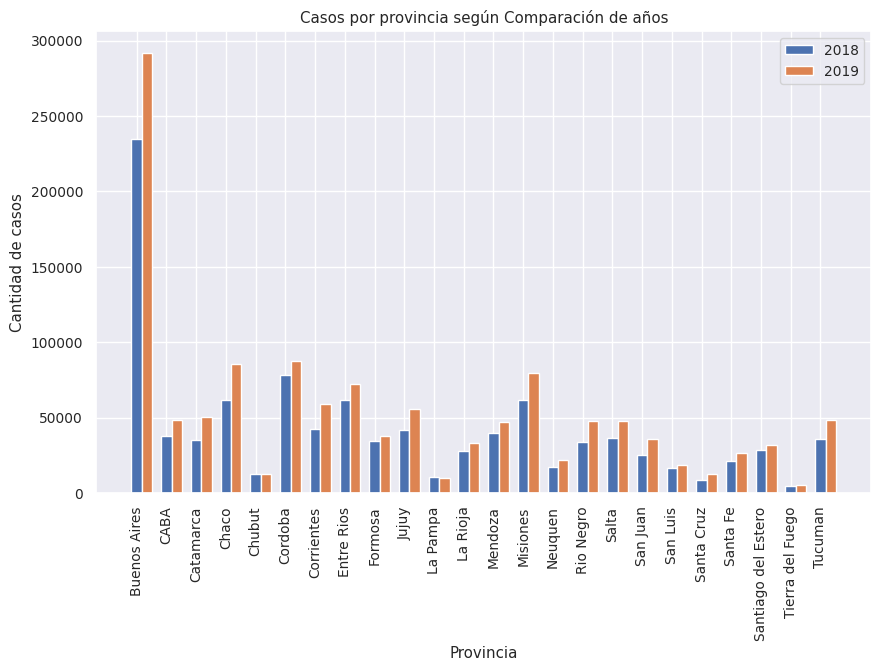

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para los dos años que deseas comparar
año1 = 2018
año2 = 2019
data_año1 = BD_RESP_2[BD_RESP_2['anio'] == año1]
data_año2 = BD_RESP_2[BD_RESP_2['anio'] == año2]

# Calcular la suma de cantidad_casos por provincia para cada año
casos_año1 = data_año1.groupby('provincia_nombre')['cantidad_casos'].sum()
casos_año2 = data_año2.groupby('provincia_nombre')['cantidad_casos'].sum()

# Obtener las provincias y sus índices
provincias = casos_año1.index
indices = range(len(provincias))

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Ancho de las barras
width = 0.35

# Generar las barras para cada año
ax.bar(indices, casos_año1, width, label=str(año1))
ax.bar([i + width for i in indices], casos_año2, width, label=str(año2))

# Establecer etiquetas de los ejes y título del gráfico
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad de casos')
ax.set_title('Casos por provincia según Comparación de años')
ax.set_xticks(indices)
ax.set_xticklabels(provincias, rotation=90)

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

- Este código genera un gráfico de distribución de enfermedades respiratorias por grupo etario en el año 2018. Filtramos los datos para obtener solo los del año 2018, se define un orden específico para los grupos de edad e importamos la biblioteca Seaborn para crear un gráfico de conteo por grupo de edad, diferenciando por tipo de evento respiratorio.
- El gráfico muestra la cantidad de eventos respiratorios en el eje y y los grupos de edad en el eje x.

Text(54.07841666666667, 0.5, 'Cantidad de eventos')

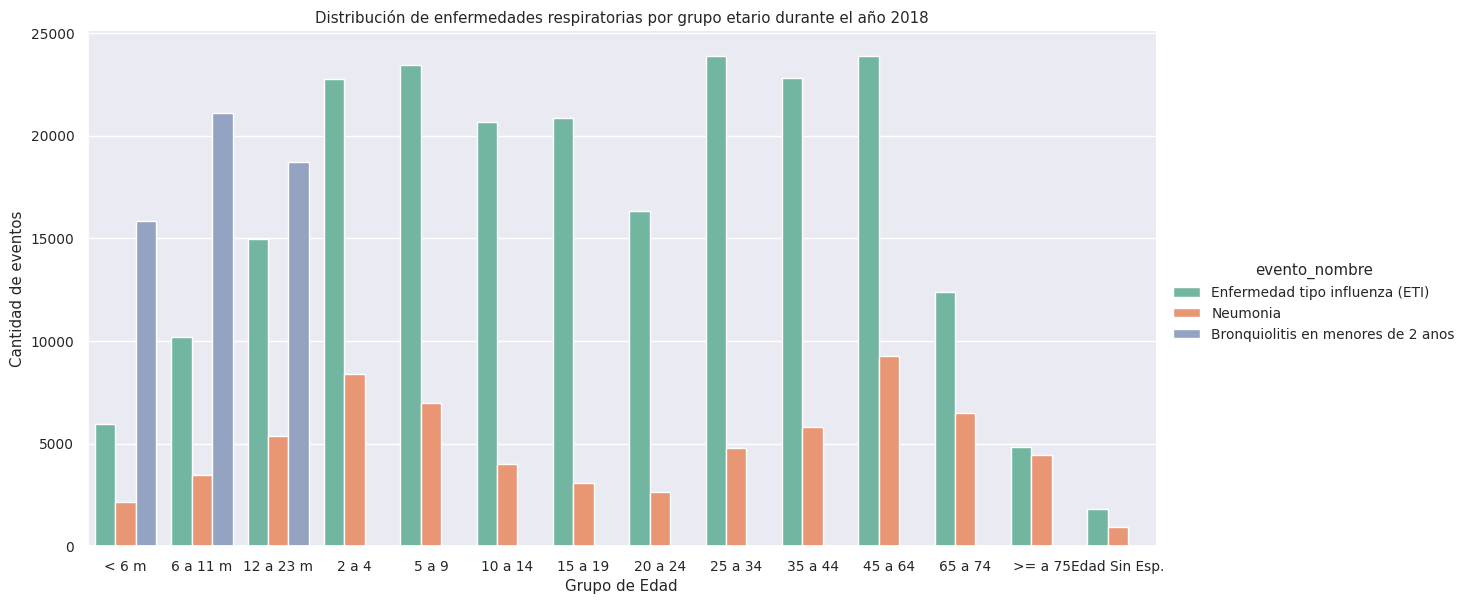

In [ ]:
#"'Distribución de enfermedades respiratorias por grupo etario en el año 2018'"
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos por año 2018
data_2018 = BD_RESP_2[BD_RESP_2['anio'] == 2018]

# Definir el orden de los grupos de edad
orden_grupos_edad = ['< 6 m', '6 a 11 m', '12 a 23 m', '2 a 4', '5 a 9', '10 a 14', '15 a 19', '20 a 24', '25 a 34', '35 a 44', '45 a 64', '65 a 74', '>= a 75', 'Edad Sin Esp.']

# Configurar el tamaño de fuente de los datos en el eje x
sns.set(font_scale=0.9)

# Grafico para el año 2018 con orden de los grupos de edad
g = sns.catplot(data=data_2018, x='grupo_edad_desc', kind="count", hue='evento_nombre', palette="Set2", order=orden_grupos_edad, aspect=2, height=6)
plt.title('Distribución de enfermedades respiratorias por grupo etario durante el año 2018')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de eventos')

- Este código genera un gráfico de distribución de enfermedades respiratorias por grupo etario en el año 2019. Filtramos los datos para obtener solo los del año 2019, se define un orden específico para los grupos de edad e importamos la bibliote Seaborn para crear un gráfico de conteo por grupo de edad, diferenciando por tipo de evento respiratorio.
- El gráfico muestra la cantidad de eventos respiratorios en el eje y y los grupos de edad en el eje x.

Text(54.07841666666667, 0.5, 'Cantidad de eventos')

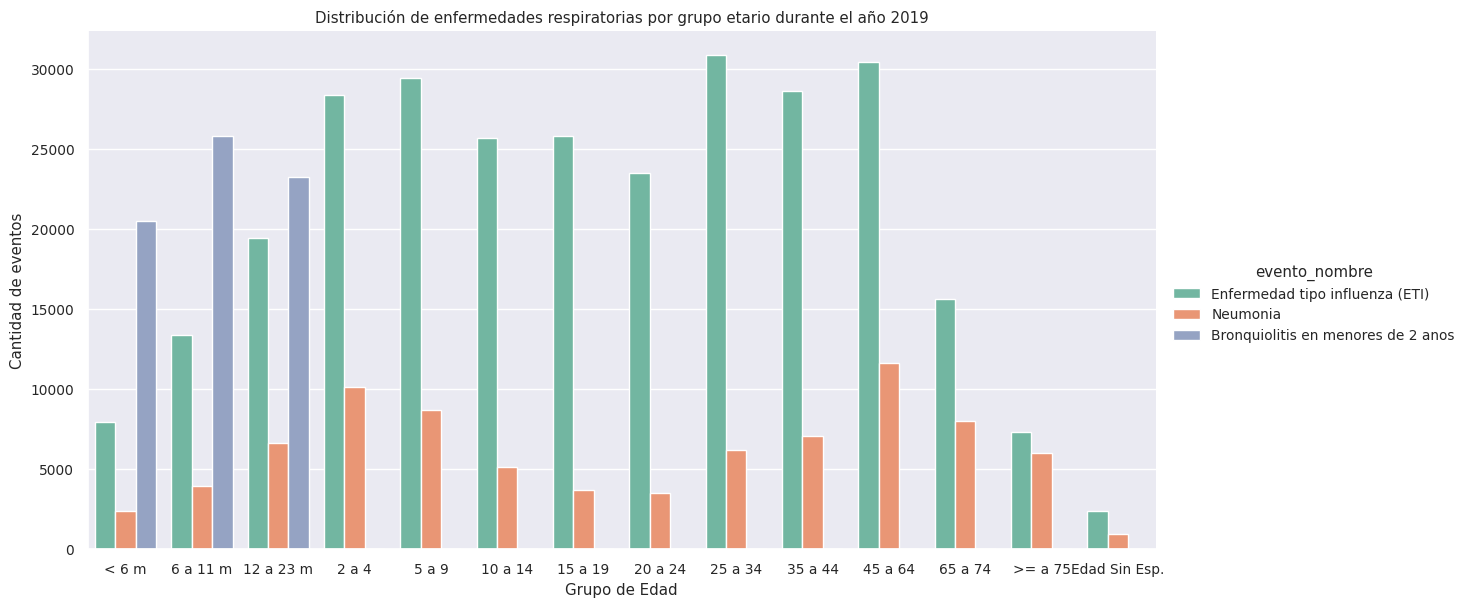

In [ ]:
#"'Distribución de enfermedades respiratorias por grupo etario en el año 2019'"
import seaborn as sns
import matplotlib.pyplot as plt
data_2019 = BD_RESP_2[BD_RESP_2['anio'] == 2019]

# Definir el orden de los grupos de edad
orden_grupos_edad = ['< 6 m', '6 a 11 m', '12 a 23 m', '2 a 4', '5 a 9', '10 a 14', '15 a 19', '20 a 24', '25 a 34', '35 a 44', '45 a 64', '65 a 74', '>= a 75', 'Edad Sin Esp.']

# Configurar el tamaño de fuente de los datos en el eje x
sns.set(font_scale=0.9)

# Grafico para el año 2018 con orden de los grupos de edad
g = sns.catplot(data=data_2019, x='grupo_edad_desc', kind="count", hue='evento_nombre', palette="Set2", order=orden_grupos_edad, aspect=2, height=6)
plt.title('Distribución de enfermedades respiratorias por grupo etario durante el año 2019')
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de eventos')

- Este código genera un gráfico de tendencia de casos a nivel nacional según las semanas epidemiológicas, comparando los años 2018 y 2019. Importamos la biblioteca Seaborn para crear un gráfico de conteo por semanas epidemiológicas, diferenciando por año.
- El gráfico muestra la cantidad de casos en el eje y y las semanas epidemiológicas en el eje x. La paleta de colores utilizada es "Set2".
- El título del gráfico indica la comparación entre los años 2018 y 2019.

Text(37.79804166666668, 0.5, 'Cantidad de casos')

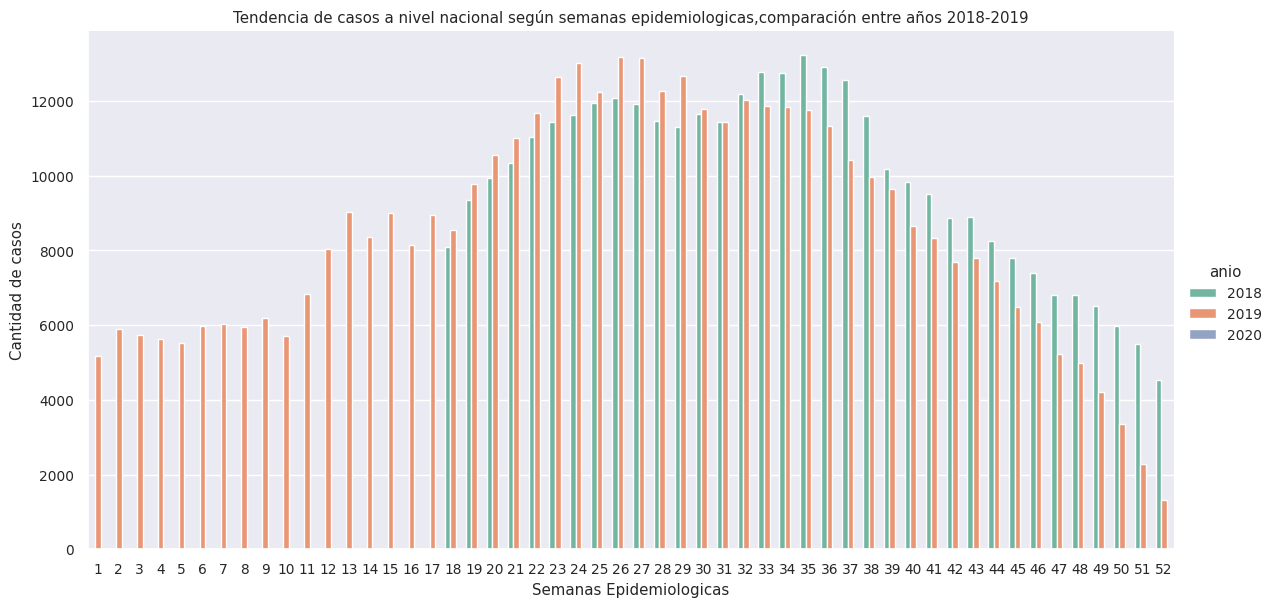

In [ ]:
#SEMANA EPIDEMIOLOGICA MAS CRITICA SEGUN AÑO
sns.catplot(data=BD_RESP_2, x='semanas_epidemiologicas', kind="count", hue='anio', palette="Set2", aspect=2, height=6)
plt.title('Tendencia de casos a nivel nacional según semanas epidemiologicas,comparación entre años 2018-2019')
plt.xlabel('Semanas Epidemiologicas')
plt.ylabel('Cantidad de casos')

- Este código genera una serie de gráficos de líneas que representan la incidencia de diferentes eventos respiratorios a lo largo de las semanas epidemiológicas en los años 2018 y 2019. Importamos las bibliotecas Seaborn y Matplotlib.

  - Se filtran los datos por año 2018 y 2019.
  - Se obtienen los eventos únicos presentes en el conjunto de datos.
  - Se crea una figura con subplots en forma de matriz para mostrar cada gráfico de líneas por evento y año.
  - Para cada evento, se filtran los datos por evento y año.
  - Se genera un gráfico de líneas para el evento y año 2018 en el subplot correspondiente, mostrando la incidencia de casos a lo largo de las semanas epidemiológicas.
  - Se configuran los ejes y títulos de cada gráfico.
  - Se repite el proceso para el año 2019.
  - Se ajustan los espacios entre los subplots. (se utiliza para crear una matriz de subplots o subgráficos)
  - Finalmente, se muestran los gráficos.

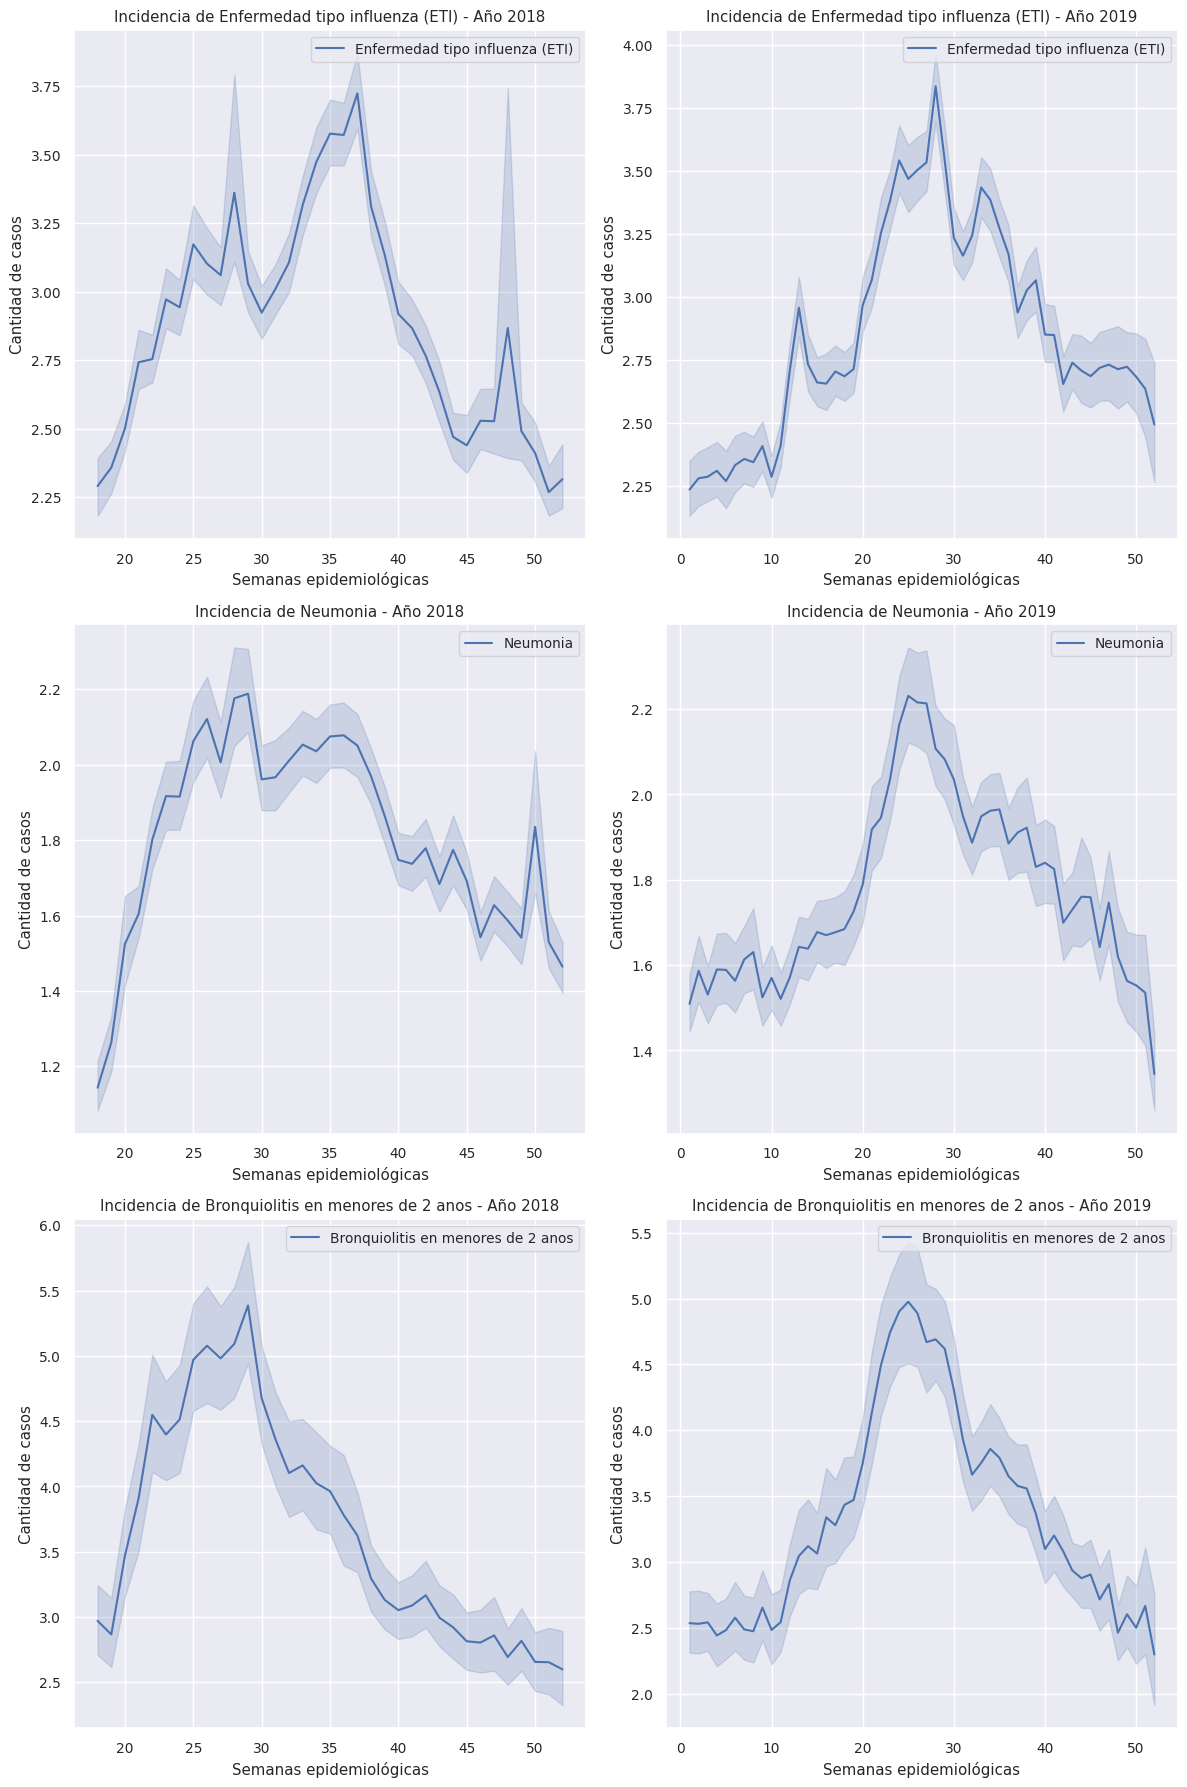

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los datos por año
data_2018 = BD_RESP_2[BD_RESP_2['anio'] == 2018]
data_2019 = BD_RESP_2[BD_RESP_2['anio'] == 2019]

# Obtener los eventos únicos
eventos = BD_RESP_2['evento_nombre'].unique()

# Configurar el tamaño de la figura
fig, axs = plt.subplots(len(eventos), 2, figsize=(12, 6*len(eventos)))

# Generar los gráficos por evento y año
for i, evento in enumerate(eventos):
    # Filtrar los datos por evento y año 2018
    data_evento_2018 = data_2018[data_2018['evento_nombre'] == evento]
    ax1 = axs[i][0]
    sns.lineplot(data=data_evento_2018, x='semanas_epidemiologicas', y='cantidad_casos', hue='evento_nombre', ax=ax1)
    ax1.set_xlabel('Semanas epidemiológicas')
    ax1.set_ylabel('Cantidad de casos')
    ax1.set_title('Incidencia de {} - Año 2018'.format(evento))
    ax1.legend(title='')

    # Filtrar los datos por evento y año 2019
    data_evento_2019 = data_2019[data_2019['evento_nombre'] == evento]
    ax2 = axs[i][1]
    sns.lineplot(data=data_evento_2019, x='semanas_epidemiologicas', y='cantidad_casos', hue='evento_nombre', ax=ax2)
    ax2.set_xlabel('Semanas epidemiológicas')
    ax2.set_ylabel('Cantidad de casos')
    ax2.set_title('Incidencia de {} - Año 2019'.format(evento))
    ax2.legend(title='')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


 - El código siguiente lee el archivo "/content/drive/MyDrive/TP FINAL IMBD/informacion-publica-respiratorias-nacional-hasta-20180626.csv".
 - Luego selecciona una muestra aleatoria de 10 filas y crea un gráfico en forma de tabla y muestra el gráfico.

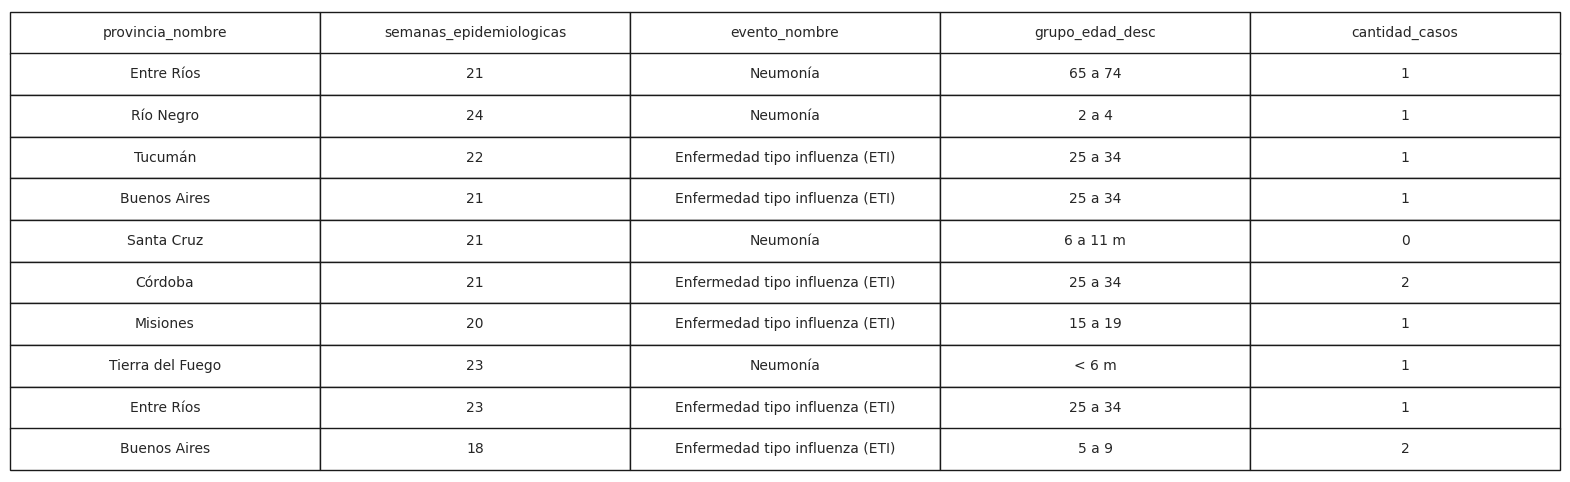

In [ ]:
#GRAFICO EN TABLA

import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
BD_RESP_2 = '/content/drive/MyDrive/TP FINAL IMBD/informacion-publica-respiratorias-nacional-hasta-20180626.csv'

# Leer el archivo CSV y obtener una muestra aleatoria de 10 filas
df = pd.read_csv(BD_RESP_2, usecols=["evento_nombre", "cantidad_casos", "grupo_edad_desc", "semanas_epidemiologicas", "provincia_nombre"], encoding='latin-1', sep=';')
df = df.sample(n=10)  # Seleccionar 10 filas aleatorias

# Crear el gráfico de tabla
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')  # Desactivar los ejes

# Mostrar la tabla
tabla = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Configurar el estilo de la tabla
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(2.5, 2.5)  # Ajustar el tamaño de la tabla

# Mostrar el gráfico de tabla
plt.show()

- Este código carga el archivo "/content/drive/MyDrive/TP FINAL IMBD/informacion-publica-respiratorias-nacional-hasta-20180626.csv".
- Luego procesa los datos para crear una tabla pivote que muestra la cantidad de casos de enfermedades respiratorias por semanas epidemiológicas y provincias.
- Por ultimo, crea un mapa de calor utilizando la librería seaborn para visualizar los datos, donde los colores representan la cantidad de casos.

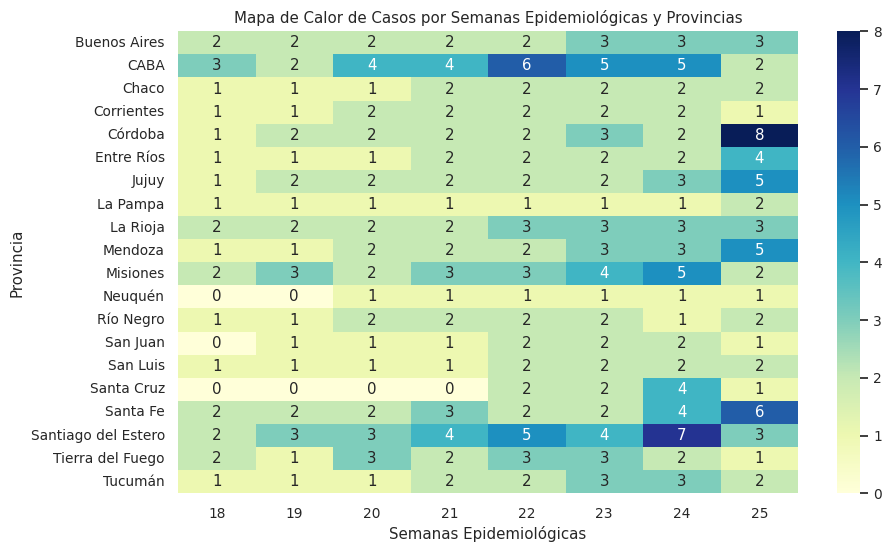

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ruta del archivo CSV
BD_RESP_2 = '/content/drive/MyDrive/TP FINAL IMBD/informacion-publica-respiratorias-nacional-hasta-20180626.csv'

# Leer el archivo CSV y obtener los datos necesarios
df = pd.read_csv(BD_RESP_2, encoding='latin-1', sep=';')
datos = df.pivot_table(index='provincia_nombre', columns='semanas_epidemiologicas', values='cantidad_casos')

# Eliminar filas y columnas que contienen valores no finitos
datos = datos.replace([np.inf, -np.inf], np.nan)
datos = datos.dropna()

# Convertir los valores a enteros
datos = datos.astype(int)

# Crear
plt.figure(figsize=(10, 6))
sns.heatmap(datos, cmap='YlGnBu', annot=True, fmt='d')

# Configurar etiquetas y título
plt.xlabel('Semanas Epidemiológicas')
plt.ylabel('Provincia')
plt.title('Mapa de Calor de Casos por Semanas Epidemiológicas y Provincias')

# Mostrar
plt.show()

- El código genera un mapa de calor interactivo que muestra la cantidad de casos respiratorios por provincia.
- Cada provincia se representa mediante un polígono coloreado según la cantidad de casos, lo que permite visualizar la distribución geográfica de los casos respiratorios.

Mapa de Calor Coroplético

In [ ]:
!pip3 install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

# Importar librerías
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import json
%matplotlib inline

from bokeh.models import GeoJSONDataSource, LinearColorMapper, HoverTool
from bokeh.palettes import brewer
import plotly as plt
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.io import output_file

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importar poligonos de provincias
shapefile = '/content/drive/MyDrive/IMD/DATAS/provincias/provincias.shp''

# Leer shapefile con geopandas y priorizar las columnas que nos importan
datos_shp = gpd.read_file(shapefile)[['IN1', 'NAM', 'geometry']]

# Chequear que las columnas seleccionadas estén presentes
#datos_shp.head(30)

# CARGANDO DF CASOS RESPIRATORIOS
casos_respiratorios = pd.read_csv("/content/drive/MyDrive/TP FINAL IMBD/vigilancia-respiratorias-agudas-2018-hasta-20200106.csv")
#casos_respiratorios.head(15)

# MOSTRANDO SOLO DATOS DE IMPORTANCIA Y AGRUPANDO LAS CANTIDADES DE CASOS POR PROVINCIA
casos_prov = casos_respiratorios[['provincia_id', 'provincia_nombre', 'grupo_edad_desc', 'cantidad_casos']]
cr_prov = casos_prov.groupby('provincia_id')['cantidad_casos'].sum().reset_index()
#cr_prov.head(25)

datos_shp['IN1'] = datos_shp['IN1'].astype('int64')

# Unir DataFrames
df_final = datos_shp.merge(cr_prov, how='inner', left_on='IN1', right_on='provincia_id')
#df_final.head(50)

# ORDENANDO LOS DATOS IMPORTANTES
df_final = df_final[['geometry', 'IN1', 'cantidad_casos', 'NAM']]
#df_final.head(25)

# Leer la data como json
merged_json = json.loads(df_final.to_json())

# Convertir objeto a string
json_data = json.dumps(merged_json)

# Max Color
max_color = df_final['cantidad_casos'].max()

# Cargar la data json_data
gsource = GeoJSONDataSource(geojson=json_data)

# Definir una paleta de colores
colores = brewer['YlGnBu'][9]

# Revertir la paleta para que a mayor número, más oscuro
colores = colores[::-1]

# Inicializar LinearColorMapper. Para que asocie un número a los colores.
color_mapper = LinearColorMapper(palette=colores, low=0, high=max_color)

# Crear el objeto figura
fig = figure(title='Mapa Coroplético en base a la cantidad de Casos',
             plot_height=600,
             plot_width=950,
             toolbar_location='below',
             background_fill_color='grey')

fig.xgrid.grid_line_color = None
fig.ygrid.grid_line_color = None
fig.title.text_font_size = '20pt'

# Ocultar los ejes
fig.axis.visible = False

#
fig.patches('xs', 'ys',
            source=gsource,
            fill_color={'field': 'cantidad_casos', 'transform': color_mapper})

GlyphRenderer(id='1198', ...)

In [ ]:
#Exportando el archivo mapa
output_file('heatmap.html')
show(fig)
#AL FINALIZAR ESTO SE VA A CREAR UN ARCHIVO CON NOMBRE "HEATMAP.HTML" en el que mostrara como la cantidad de casos se concentran en todo BSAS#
#Es mas rapido arrastrarlo a 'Mydrive' y descargarlo de ahi que descargarlo desde aca

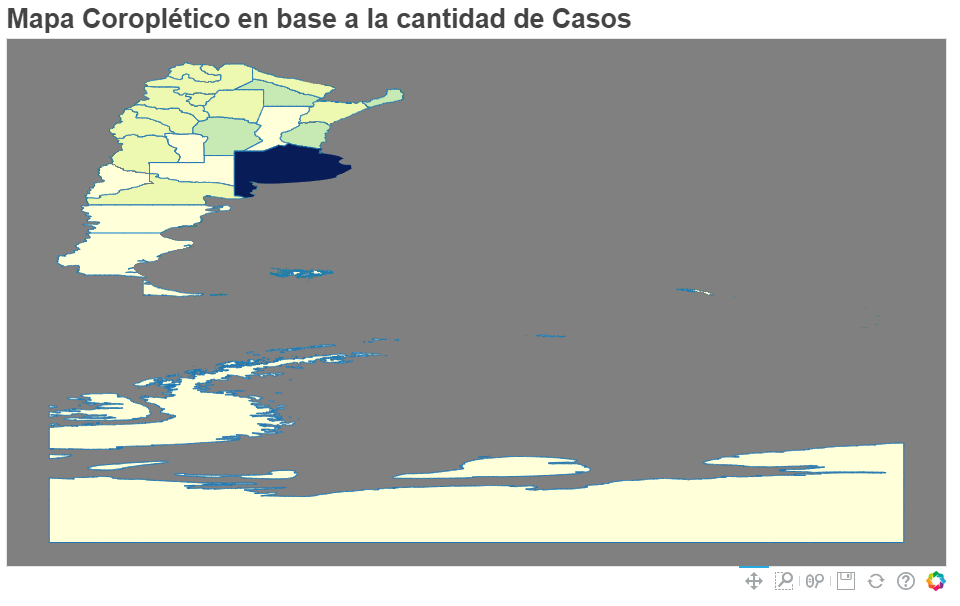